## 1.导入需要的库

In [2]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

## 2.导入数据，探索数据

In [3]:
import pandas as pd
housevalue = fch()
x = pd.DataFrame(housevalue.data)
y = housevalue.target

In [4]:
x.shape

(20640, 8)

In [5]:
y.shape

(20640,)

In [6]:
x.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housevalue

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [8]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
x.columns = housevalue.feature_names

In [10]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 3.分训练集和测试集

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [12]:
x_train.head()#这个时候索引是乱序的

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [13]:
x_train.shape

(14448, 8)

In [14]:
#我想要x_train,x_test索引都是从0开始
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [15]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


## 4.建模

In [16]:
reg = LR(normalize=True).fit(x_train,y_train)
yhat = reg.predict(x_test)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

## 5.探索建好的模型

In [17]:
reg.coef_   #系数w

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [18]:
[*zip(x_train.columns,reg.coef_)]

[('MedInc', 0.43735893059684045),
 ('HouseAge', 0.010211268294494105),
 ('AveRooms', -0.10780721617317687),
 ('AveBedrms', 0.6264338275363786),
 ('Population', 5.216125353265511e-07),
 ('AveOccup', -0.0033485096463335903),
 ('Latitude', -0.41309593789477145),
 ('Longitude', -0.42621095362084693)]

In [19]:
reg.intercept_  #截距还挺大的

-36.25689322920389

# 2.4多元线性回归的模型评估指标

In [20]:
# MSE(mean squared error)均方误差
# metrics.mean_squared_error
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,y_test)

0.5309012639324571

In [21]:
y.max()

5.00001

In [22]:
y.min()

0.14999

In [23]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['adjusted_rand_score', 'precision', 'neg_mean_squared_error', 'fowlkes_mallows_score', 'precision_weighted', 'precision_micro', 'balanced_accuracy', 'mutual_info_score', 'neg_median_absolute_error', 'average_precision', 'f1_micro', 'brier_score_loss', 'recall_weighted', 'f1', 'recall_micro', 'precision_samples', 'neg_mean_squared_log_error', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'f1_samples', 'roc_auc', 'normalized_mutual_info_score', 'explained_variance', 'recall', 'f1_weighted', 'adjusted_mutual_info_score', 'neg_log_loss', 'homogeneity_score', 'neg_mean_absolute_error', 'recall_samples', 'r2', 'v_measure_score', 'completeness_score'])

In [26]:
cross_val_score(reg,x,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [27]:
x_test.shape

(6192, 8)

r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

In [28]:
from sklearn.metrics import r2_score
r2_score(yhat,y_test)  #这样的表达就错了，再回归模型中，我们严格要求写清楚y_true,y_pred的位置

0.3380653761556006

In [29]:
r2_score(y_true=y_test, y_pred=yhat)

0.6043668160178817

In [30]:
reg.score(x_test,y_test)

0.6043668160178817

In [32]:
y_test.shape

(6192,)

In [34]:
import numpy as np
c = np.hstack((y_test.reshape(-1,1),yhat.reshape(-1,1)))

In [35]:
c.shape

(6192, 2)

In [36]:
data2 = pd.DataFrame(c)
data2.head()

,0,1
0,0.967,1.513849
1,0.616,0.465662
2,2.298,2.256773
3,3.563,2.313086
4,1.666,2.458239


In [37]:
data2.describe()

,0,1
count,6192.000000,6192.000000
mean,2.081929,2.063855
std,1.158499,0.895642
min,0.149990,-0.652844
25%,1.220000,1.501433
50%,1.813000,2.015968
75%,2.656250,2.535802
max,5.000010,7.146198


In [38]:
name = ["y_test","yhat"]
data2.columns = name

In [39]:
data2.describe()

,y_test,yhat
count,6192.000000,6192.000000
mean,2.081929,2.063855
std,1.158499,0.895642
min,0.149990,-0.652844
25%,1.220000,1.501433
50%,1.813000,2.015968
75%,2.656250,2.535802
max,5.000010,7.146198


In [40]:
# pd.concat([a,b],axis=1),2个dataframe左右相连
h = pd.concat([pd.DataFrame(y_test),pd.DataFrame(yhat)],axis=1)
name = ["y_test","yhat"]
h.columns = name
h.head()

,y_test,yhat
0,0.967,1.513849
1,0.616,0.465662
2,2.298,2.256773
3,3.563,2.313086
4,1.666,2.458239


In [39]:
#解释性方差
from sklearn.metrics import explained_variance_score as EVS
EVS(y_test,yhat)

0.6046102673854399

In [40]:
cross_val_score(reg,x,y,cv=10,scoring="explained_variance")

array([0.54187714, 0.6656149 , 0.47809615, 0.50688473, 0.58687308,
       0.54979333, 0.49559713, 0.4639423 , 0.49176267, 0.60454547])

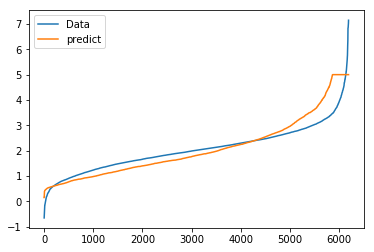

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(len(yhat)),sorted(yhat),label="Data")
plt.plot(range(len(y_test)),sorted(y_test),label="predict")
plt.legend()
plt.show()

In [69]:
d = (np.linspace(0,len(yhat)-1,50)).astype("int")

In [70]:
d

array([   0,  126,  252,  379,  505,  631,  758,  884, 1010, 1137, 1263,
       1389, 1516, 1642, 1768, 1895, 2021, 2147, 2274, 2400, 2526, 2653,
       2779, 2905, 3032, 3158, 3285, 3411, 3537, 3664, 3790, 3916, 4043,
       4169, 4295, 4422, 4548, 4674, 4801, 4927, 5053, 5180, 5306, 5432,
       5559, 5685, 5811, 5938, 6064, 6191])

In [71]:
yhat_ = []
y_test_ = []
for i in d:
#     print(i)
    middle = yhat[i]
    middle1 = y_test[i]
#     print(middle)
    yhat_.append(middle)
    y_test_.append(middle1)
yhat_ = np.array(yhat_)
y_test_ = np.array(y_test_)

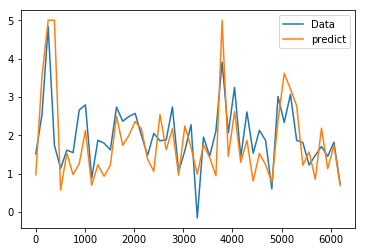

In [72]:
plt.plot(d,yhat_,label="Data")
plt.plot(d,y_test_,label="predict")
plt.legend()
plt.show()

# 我们尝试将数据经过pca降维处理后再回归

In [74]:
from sklearn.decomposition import PCA
pca_mle = PCA(n_components="mle").fit(x)
x_mle = pca_mle.transform(x)
x_mle

array([[-1.10351265e+03,  8.56663624e+00, -7.74104267e-01, ...,
         2.73671858e+00, -3.74666242e+00, -1.33840490e-01],
       [ 9.75541244e+02, -4.67041774e+00, -1.02568060e+00, ...,
         1.64756479e+00, -3.91094740e+00, -5.61873090e-03],
       [-9.29549908e+02,  2.00346509e+01, -1.97273701e+00, ...,
         3.96784052e+00, -2.26989335e+00, -6.97511796e-02],
       ...,
       [-4.18437575e+02, -1.29082558e+01,  1.01901295e+00, ...,
        -2.58145839e+00,  1.75428879e+00, -9.97278741e-01],
       [-6.84439525e+02, -1.27945805e+01,  9.74409305e-01, ...,
        -2.42779622e+00,  1.63168668e+00, -9.33492785e-01],
       [-3.84362474e+01, -1.26703781e+01,  1.04286818e+00, ...,
        -2.19840471e+00,  1.17996360e+00, -1.01309763e+00]])

In [75]:
x_mle.shape

(20640, 7)

In [78]:
pca_mle.explained_variance_

array([1.28248501e+06, 1.45311939e+02, 1.06832301e+02, 8.26485165e+00,
       6.57888123e+00, 2.97385061e+00, 2.49931609e-01])

In [79]:
pca_mle.explained_variance_ratio_

array([9.99789327e-01, 1.13281110e-04, 8.32834638e-05, 6.44304641e-06,
       5.12871119e-06, 2.31833048e-06, 1.94839669e-07])

In [80]:
pca_mle.explained_variance_ratio_.sum()

0.9999999762777433

In [81]:
#我直接决定降成3维
pca = PCA(n_components=3).fit(x)
x_ = pca.transform(x)
x_

array([[-1.10351265e+03,  8.56663624e+00, -7.74104267e-01],
       [ 9.75541244e+02, -4.67041774e+00, -1.02568060e+00],
       [-9.29549908e+02,  2.00346509e+01, -1.97273701e+00],
       ...,
       [-4.18437575e+02, -1.29082558e+01,  1.01901295e+00],
       [-6.84439525e+02, -1.27945805e+01,  9.74409305e-01],
       [-3.84362474e+01, -1.26703781e+01,  1.04286818e+00]])

In [82]:
pca.explained_variance_ratio_

array([9.99789327e-01, 1.13281110e-04, 8.32834638e-05])

In [83]:
pca.explained_variance_ratio_.sum()

0.9999858913499904

In [85]:
x_ = pd.DataFrame(x_)
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size=0.3,random_state=420)
x_train.head()#这个时候索引是乱序的

,0,1,2
17073,3954.479381,19.017976,-4.452506
16956,-996.503118,6.040882,-0.386828
20012,-534.465167,-4.321659,0.708388
13072,-692.451879,-8.750568,1.323880
8457,-291.492297,4.361086,-0.617611


In [86]:
#我想要x_train,x_test索引都是从0开始
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

#建模
reg = LR(normalize=True).fit(x_train,y_train)
yhat = reg.predict(x_test)
yhat

array([2.19428265, 2.06433002, 1.93682589, ..., 2.16263401, 2.14340416,
       1.88093373])

In [87]:
r3 = reg.score(x_test,y_test)

In [88]:
r3

0.010467228231330616

In [89]:
EVS(y_test,yhat)

0.010684895949452988

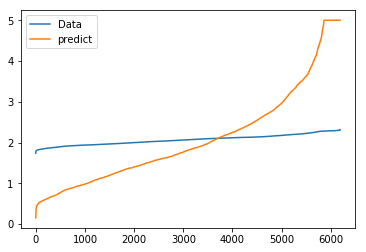

In [90]:
import matplotlib.pyplot as plt
plt.plot(range(len(yhat)),sorted(yhat),label="Data")
plt.plot(range(len(y_test)),sorted(y_test),label="predict")
plt.legend()
plt.show()